In [544]:
import json

title = []
loss = []
runtime = []

In [545]:
with open('Adam.json', 'r') as f:
    file = json.load(f)

In [546]:
title.append(file["optimizer"])
loss.append(file["loss"])
runtime.append(file["runtime"])


In [547]:
with open('Nadam.json', 'r') as f:
    file = json.load(f)

In [548]:
title.append(file["optimizer"])
loss.append(file["loss"])
runtime.append(file["runtime"])

In [549]:
with open('Adamax.json', 'r') as f:
    file = json.load(f)

In [550]:
title.append(file["optimizer"])
loss.append(file["loss"])
runtime.append(file["runtime"])

In [551]:
with open('Adagrad.json', 'r') as f:
    file = json.load(f)

In [552]:
title.append(file["optimizer"])
loss.append(file["loss"])
runtime.append(file["runtime"])

In [553]:
with open('RMSprop.json', 'r') as f:
    file = json.load(f)

In [554]:
title.append(file["optimizer"])
loss.append(file["loss"])
runtime.append(file["runtime"])

In [555]:
import pandas as pd

df = pd.DataFrame()
df["OPTIMIZERS"] = title
df["LOSS VALUES"] = loss
df["RUNTIME"] = runtime
df.head()

,OPTIMIZERS,LOSS VALUES,RUNTIME
0,Adam,"[0.2396256923675537, 0.013074187561869621, 0.0...",210.948250
1,Nadam,"[0.03520595282316208, 0.0018618665635585785, 0...",227.107685
2,Adamax,"[2.431581974029541, 0.6687426567077637, 0.4229...",214.900111
3,Adagrad,"[3.795670747756958, 3.7419166564941406, 3.5876...",176.157781
4,RMSprop,"[0.0, 0.14184865355491638, 1.6689293147464923e...",177.349503


In [556]:
def list_parser(list):
    other_list = []
    for i in list:
        other_list.append(i)
    return other_list

In [557]:
import matplotlib.pyplot as plt
epoch = []
epoch = [epoch for epoch in range(0, 5000, 100)]


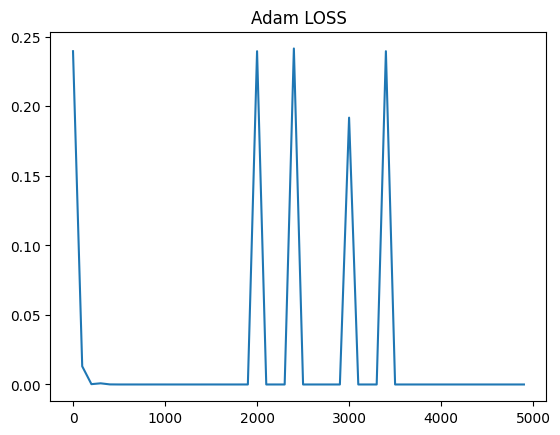

In [558]:
adam_loss= list_parser(loss[0]) #Adam
plt.title("Adam LOSS")
plt.plot(epoch, adam_loss)    

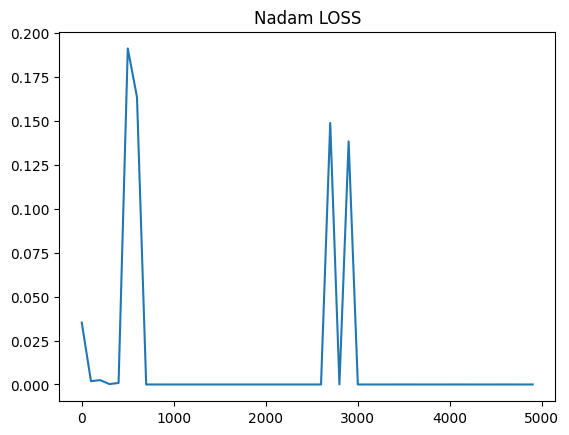

In [559]:
nadam_loss= list_parser(loss[1]) #Nadam
plt.title("Nadam LOSS")
plt.plot(epoch, nadam_loss)    

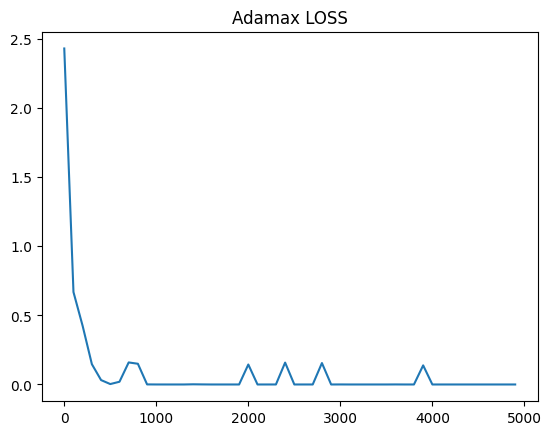

In [560]:
adamax_loss = list_parser(loss[2]) #Adamax
plt.title("Adamax LOSS")
plt.plot(epoch, adamax_loss)    

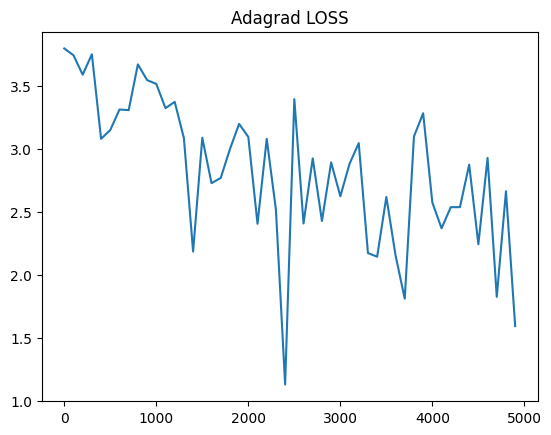

In [561]:
adagrad_loss = list_parser(loss[3]) #Adagrad
plt.title("Adagrad LOSS")
plt.plot(epoch, adagrad_loss)    

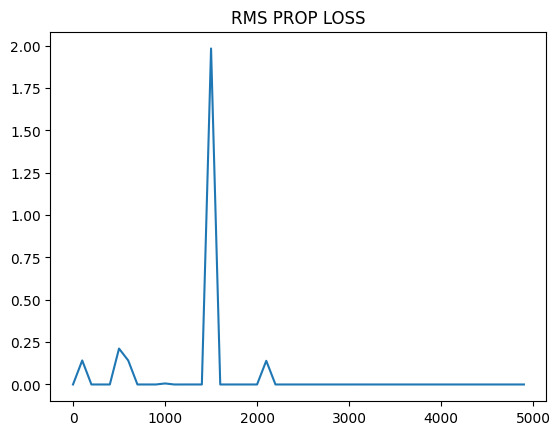

In [562]:
rmsprop_loss = list_parser(loss[4]) #RMSProp
plt.title("RMS PROP LOSS")
plt.plot(epoch, rmsprop_loss)    

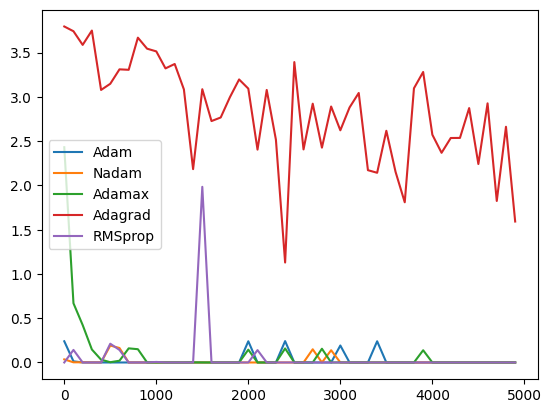

In [563]:
plt.plot(epoch, adam_loss)    
plt.plot(epoch, nadam_loss)    
plt.plot(epoch, adamax_loss)    
plt.plot(epoch, adagrad_loss)  
plt.plot(epoch, rmsprop_loss)  
plt.legend(title)
plt.show()

In [564]:
def average(a):  
    if len(a) == 1:  
        return a[0]  
    else:  
        n = len(a)
        return ((a[0] + (n - 1) * average(a[1:])) / n  )

In [565]:
adam_ave = average(adam_loss)
nadam_ave = average(nadam_loss)
adamax_ave = average(adamax_loss)
adagrad_ave = average(adagrad_loss)
rmsprop_ave = average(rmsprop_loss)
averages = adam_ave, nadam_ave, adamax_ave, adagrad_ave, rmsprop_ave

In [566]:
final_df = pd.DataFrame()

In [567]:
final_df["OPTIMIZERS"] = title
final_df["AVERAGE LOSS"] = averages
final_df["RT SECS"] = runtime

In [568]:
final_df.head()

,OPTIMIZERS,AVERAGE LOSS,RT SECS
0,Adam,0.023331,210.948250
1,Nadam,0.013660,227.107685
2,Adamax,0.092667,214.900111
3,Adagrad,2.828224,176.157781
4,RMSprop,0.052518,177.349503


In [569]:
final_df.describe()

,AVERAGE LOSS,RT SECS
count,5.000000,5.000000
mean,0.602080,201.292666
std,1.244832,23.183214
min,0.013660,176.157781
25%,0.023331,177.349503
50%,0.052518,210.948250
75%,0.092667,214.900111
max,2.828224,227.107685


In [570]:
ratio = [] 
for i in range(0, len(runtime)):
    score = averages[i] / runtime[i]
    ratio.append(float("%.6f" % score))

final_df["AVE / RT"] = ratio

In [571]:
final_df.head()

,OPTIMIZERS,AVERAGE LOSS,RT SECS,AVE / RT
0,Adam,0.023331,210.948250,0.000111
1,Nadam,0.013660,227.107685,0.000060
2,Adamax,0.092667,214.900111,0.000431
3,Adagrad,2.828224,176.157781,0.016055
4,RMSprop,0.052518,177.349503,0.000296


Text(0.5, 1.0, 'Average Loss / Runtime Seconds')

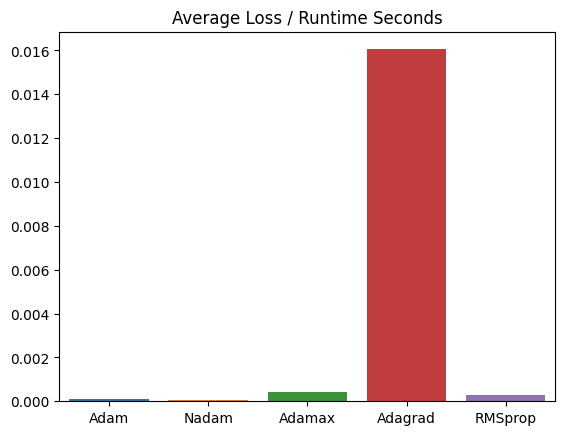

In [572]:
import seaborn as sns


sns.barplot(x = title, y = ratio).set_title("Average Loss / Runtime Seconds")

### Conclusion

1. The Optimizer that produce the least amount of Loss is the Nadam optimizer at 0.006845. While the fastest Optimizer is the Adagrad with a 111.67 second runtime.
2. Nadam is Best Boi

In [573]:
import torch
from model import NeuralNet
from torch.utils.data import Dataset, DataLoader
from nltk_utils import bag_of_words, tokenize, lem
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with open('intents.json', 'r') as f:
    intents = json.load(f)


all_words = []
tags = []
xy = []
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    tag = intent['tag']
    # add to tag list
    tags.append(tag)
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = tokenize(pattern)
        # add to our words list
        all_words.extend(w)
        # add to xy pair
        xy.append((w, tag))
# lemmatize and lower each word
ignore_words = ['?', '.', '!', "'", "(", ")", ',']
all_words = [lem(w) for w in all_words if w not in ignore_words]
# remove duplicates and sort
all_words = sorted(set(all_words))
tags = sorted(set(tags))

print(len(xy), "patterns")
print(len(tags), "tags:", tags)
print(len(all_words), "unique lemmatized words:", all_words)

# create training data
X_train = []
y_train = []
for (pattern_sentence, tag) in xy:
    # X: bag of words for each pattern_sentence
    bag = bag_of_words(pattern_sentence, all_words)
    X_train.append(bag)
    # y: PyTorch CrossEntropyLoss needs only class labels, not one-hot
    label = tags.index(tag)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)



# Hyper-parameters 
num_epochs = 5000
batch_size = 8
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)
print(input_size, output_size)

class ChatDataset(Dataset):

    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples
    

    

dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)


237 patterns
45 tags: ['General Kenobi', "Parent's", 'PreReg', 'Transcript of Records', 'When to pay?', 'Where to pay', 'Your Name', 'access registration', 'cannot add subject', 'change grade', 'class standing', 'commence ceremony schedule', 'data Registrar', 'diploma', 'electronic Transcript of Records', 'entry cards/invitations graduation rites', 'failed deadline', 'gone', 'goodbye', 'graduate first semester or summer', 'graduation academic honors', 'graduation application', 'graduation fee', 'greeting', 'hold Transcript of Records', 'lost diploma', 'name update', 'officially enrolled', 'online enrollment limit', 'pay w/o attendance', 'pre-registration', 'program code and section', 'program code and section code', 'regular student', 'requests Transcript of Records', 'reservation', 'reserve', 'schedule Transcript of Records', 'shift', 'students not in class', 'thanks', 'transaction 2', 'transfer', 'unofficial Transcript of Records', 'where grades?']
246 unique lemmatized words: ["'apm

In [574]:
def check_accuracy(loader, model):
    confusion_matrix = torch.zeros(output_size, output_size)
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            for t, p in zip(x.view(-1), predictions.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}') 
    
    model.train()

In [575]:
def check_cnfmatrix(loader, model):
    nb_classes = output_size
    confusion_matrix = np.zeros((nb_classes, nb_classes))
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(loader):
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for t, p in zip(classes.view(-1), preds.view(-1)):
                    confusion_matrix[t.long(), p.long()] += 1

    plt.figure(figsize=(15,10))

    class_names = tags
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Got 235 / 237 with accuracy 99.16


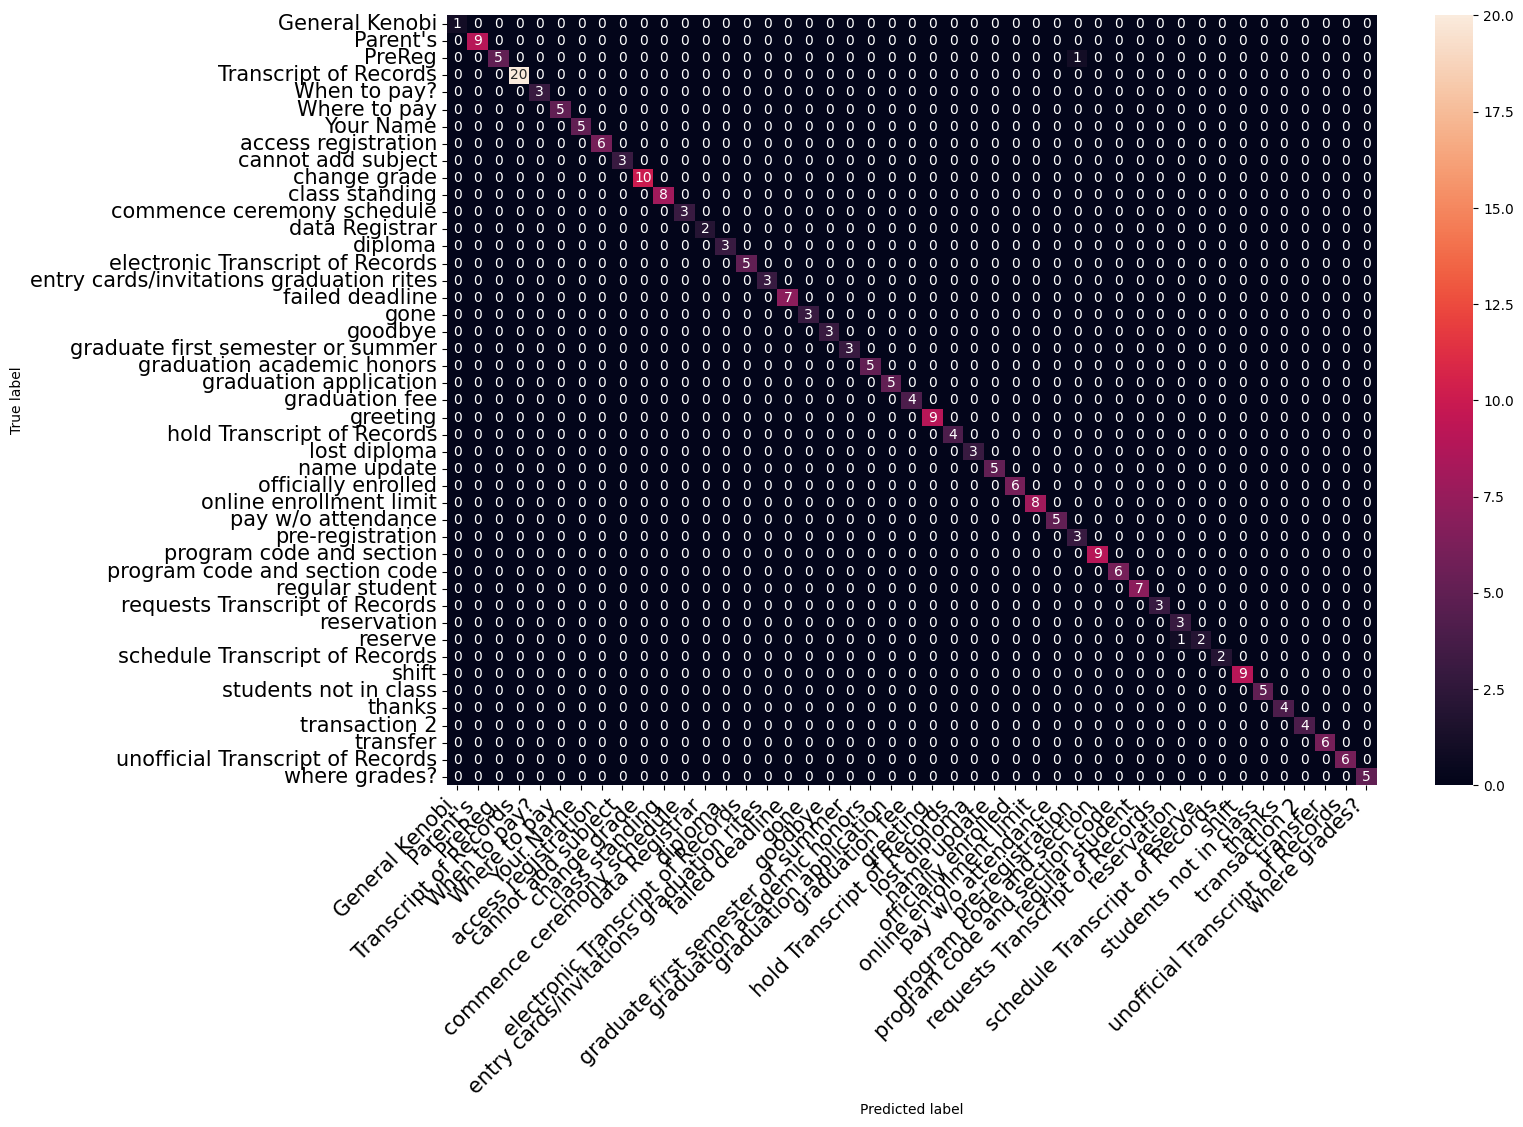

In [576]:
FILE = "Adam.pth"
data = torch.load(FILE)
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
check_accuracy(train_loader, model)
check_cnfmatrix(train_loader, model)

Got 235 / 237 with accuracy 99.16


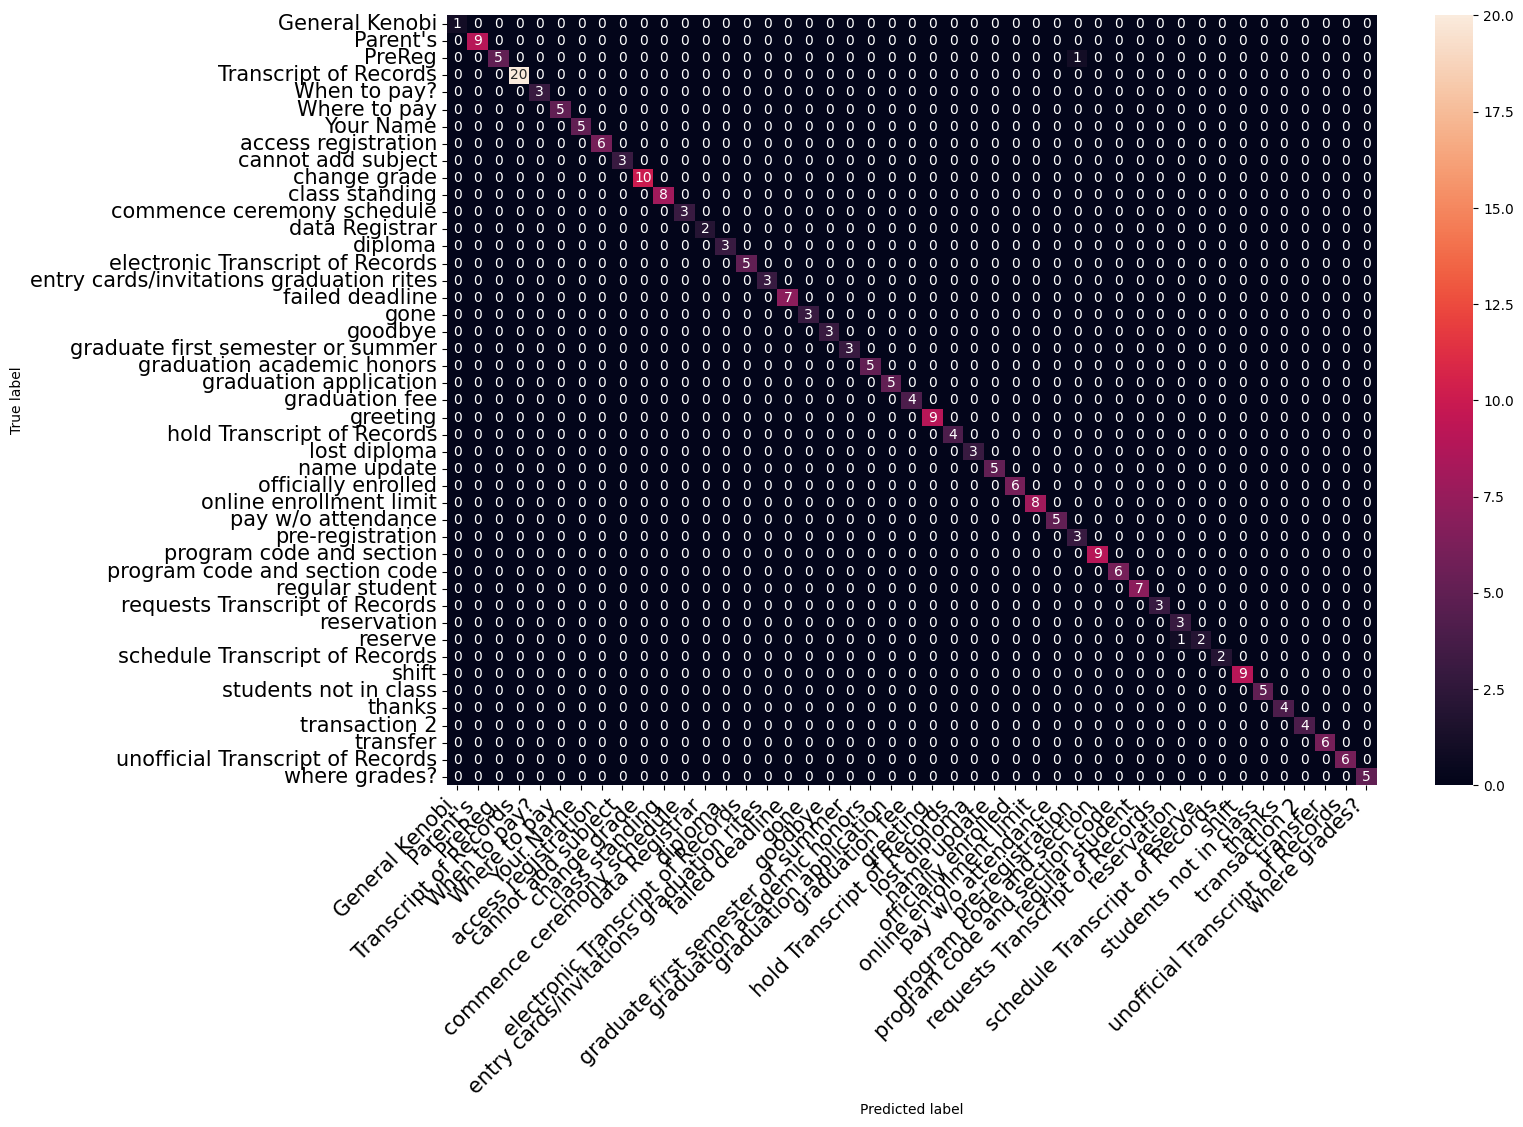

In [577]:
FILE = "Nadam.pth"
data = torch.load(FILE)
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
check_accuracy(train_loader, model)
check_cnfmatrix(train_loader, model)

Got 235 / 237 with accuracy 99.16


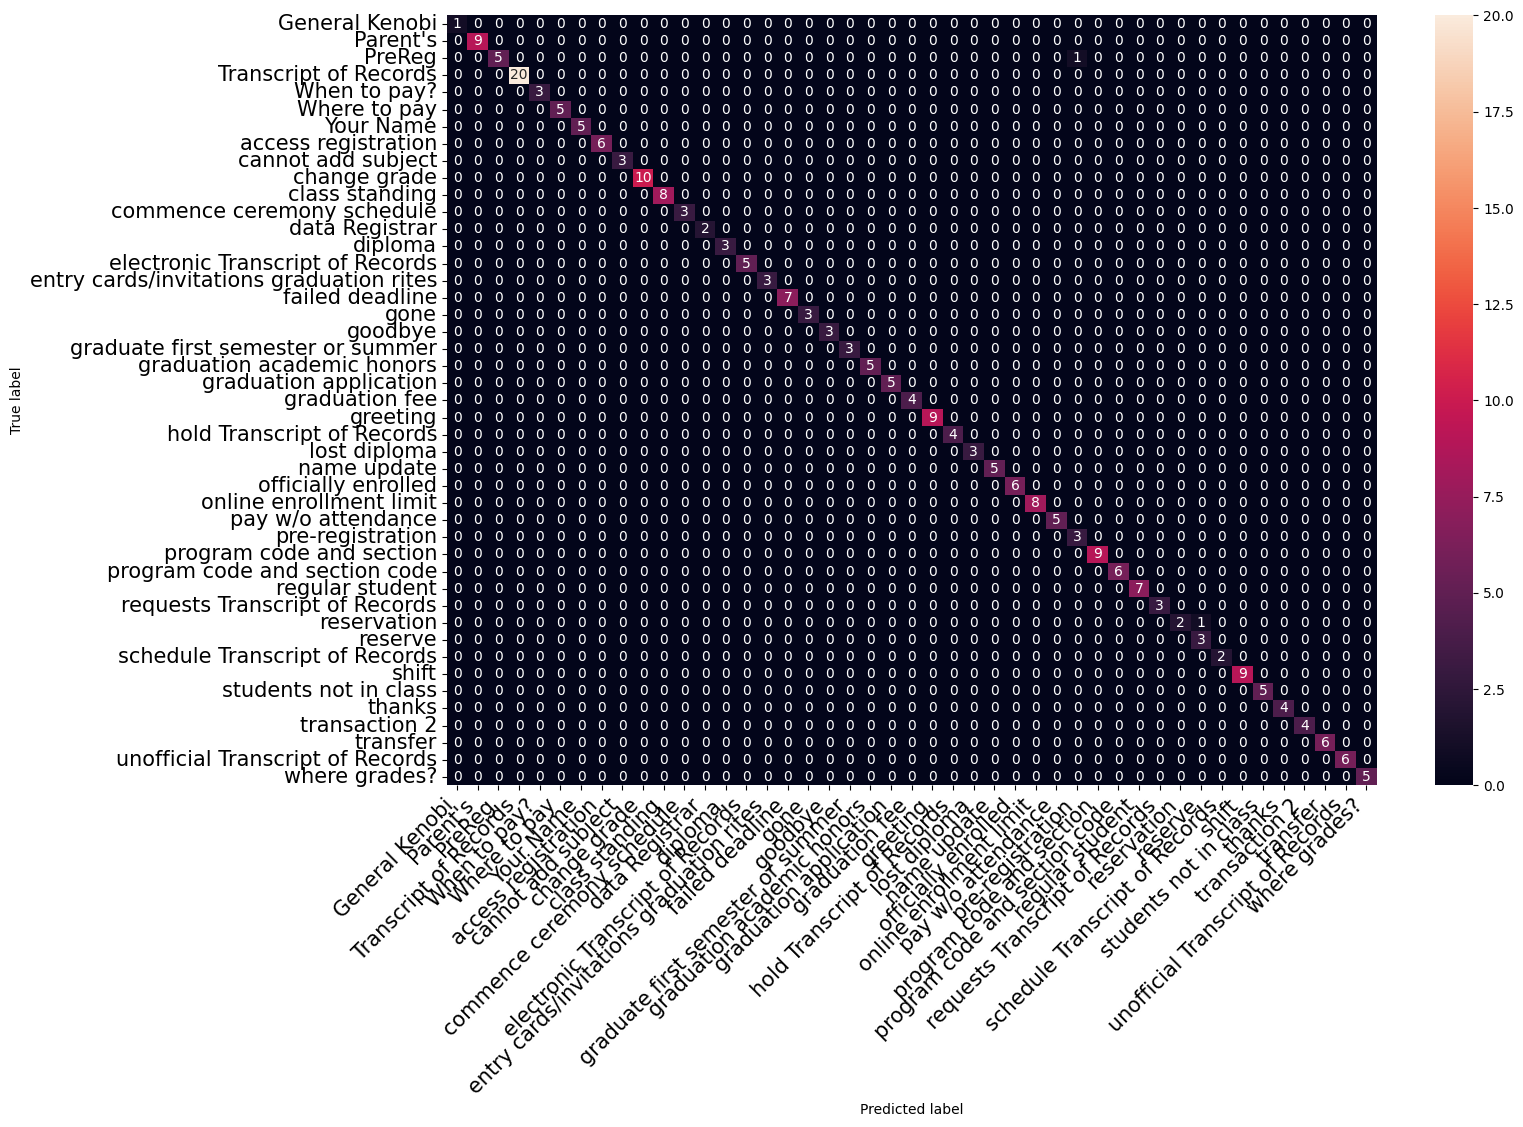

In [578]:
FILE = "Adamax.pth"
data = torch.load(FILE)
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
check_accuracy(train_loader, model)
check_cnfmatrix(train_loader, model)

Got 89 / 237 with accuracy 37.55


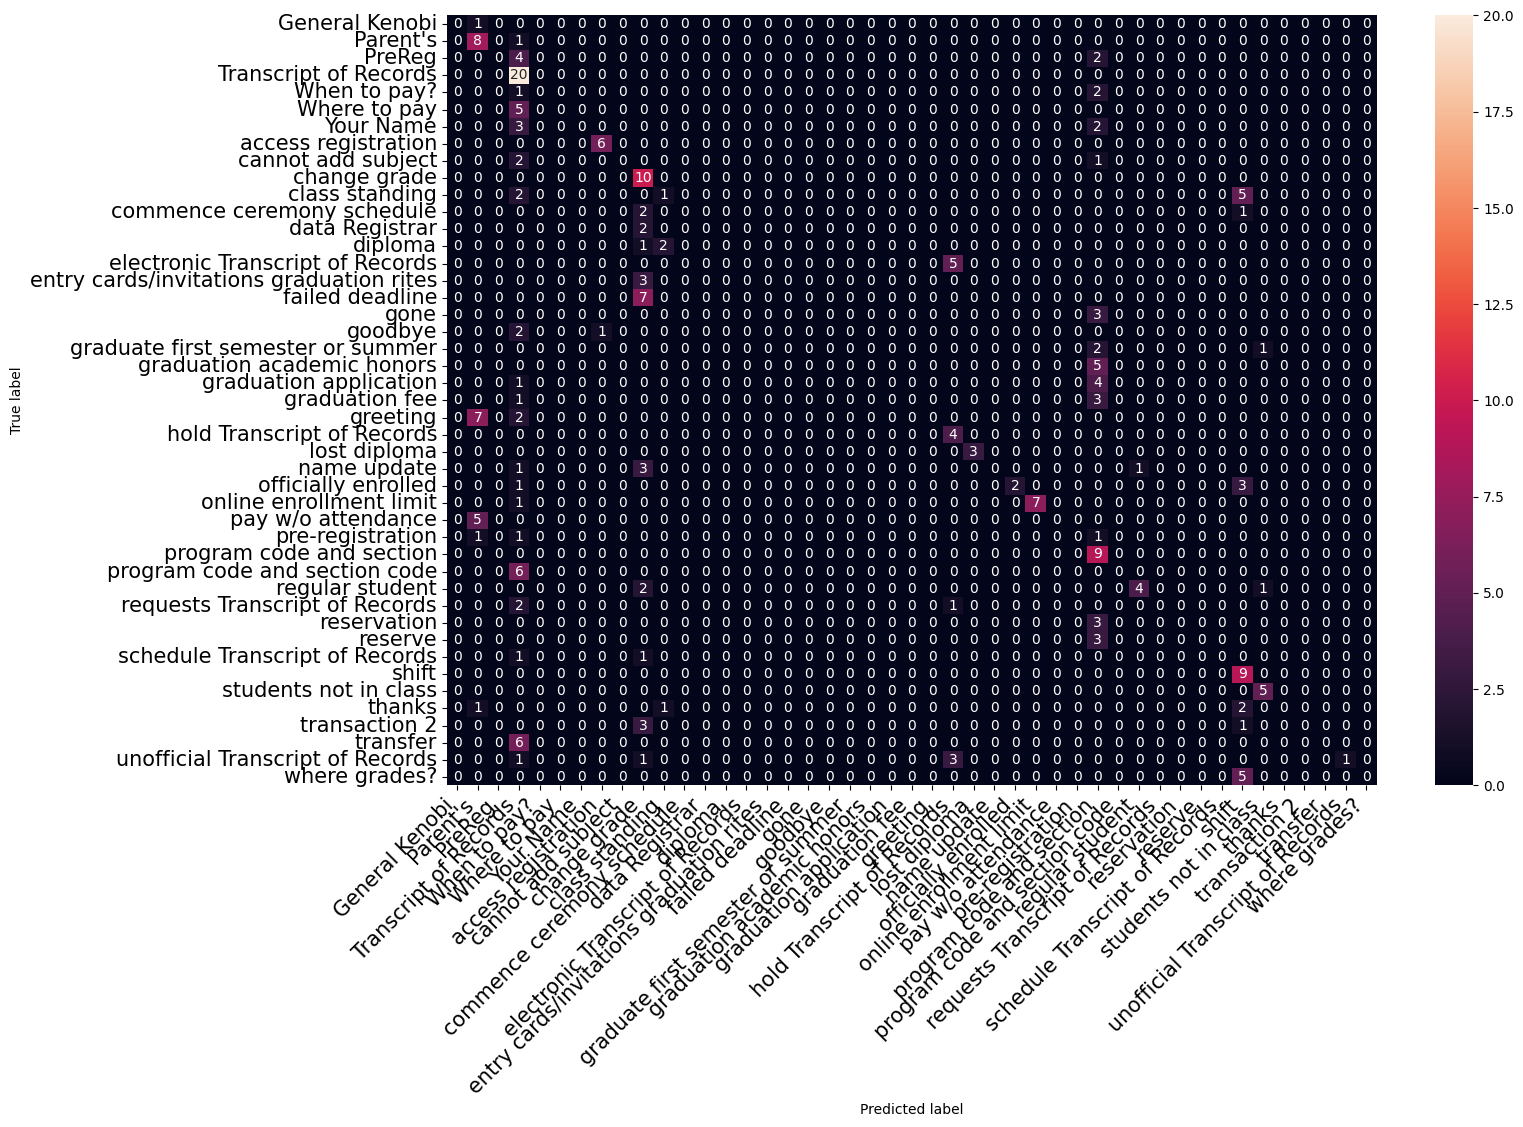

In [579]:
FILE = "Adagrad.pth"
data = torch.load(FILE)
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
check_accuracy(train_loader, model)
check_cnfmatrix(train_loader, model)

Got 235 / 237 with accuracy 99.16


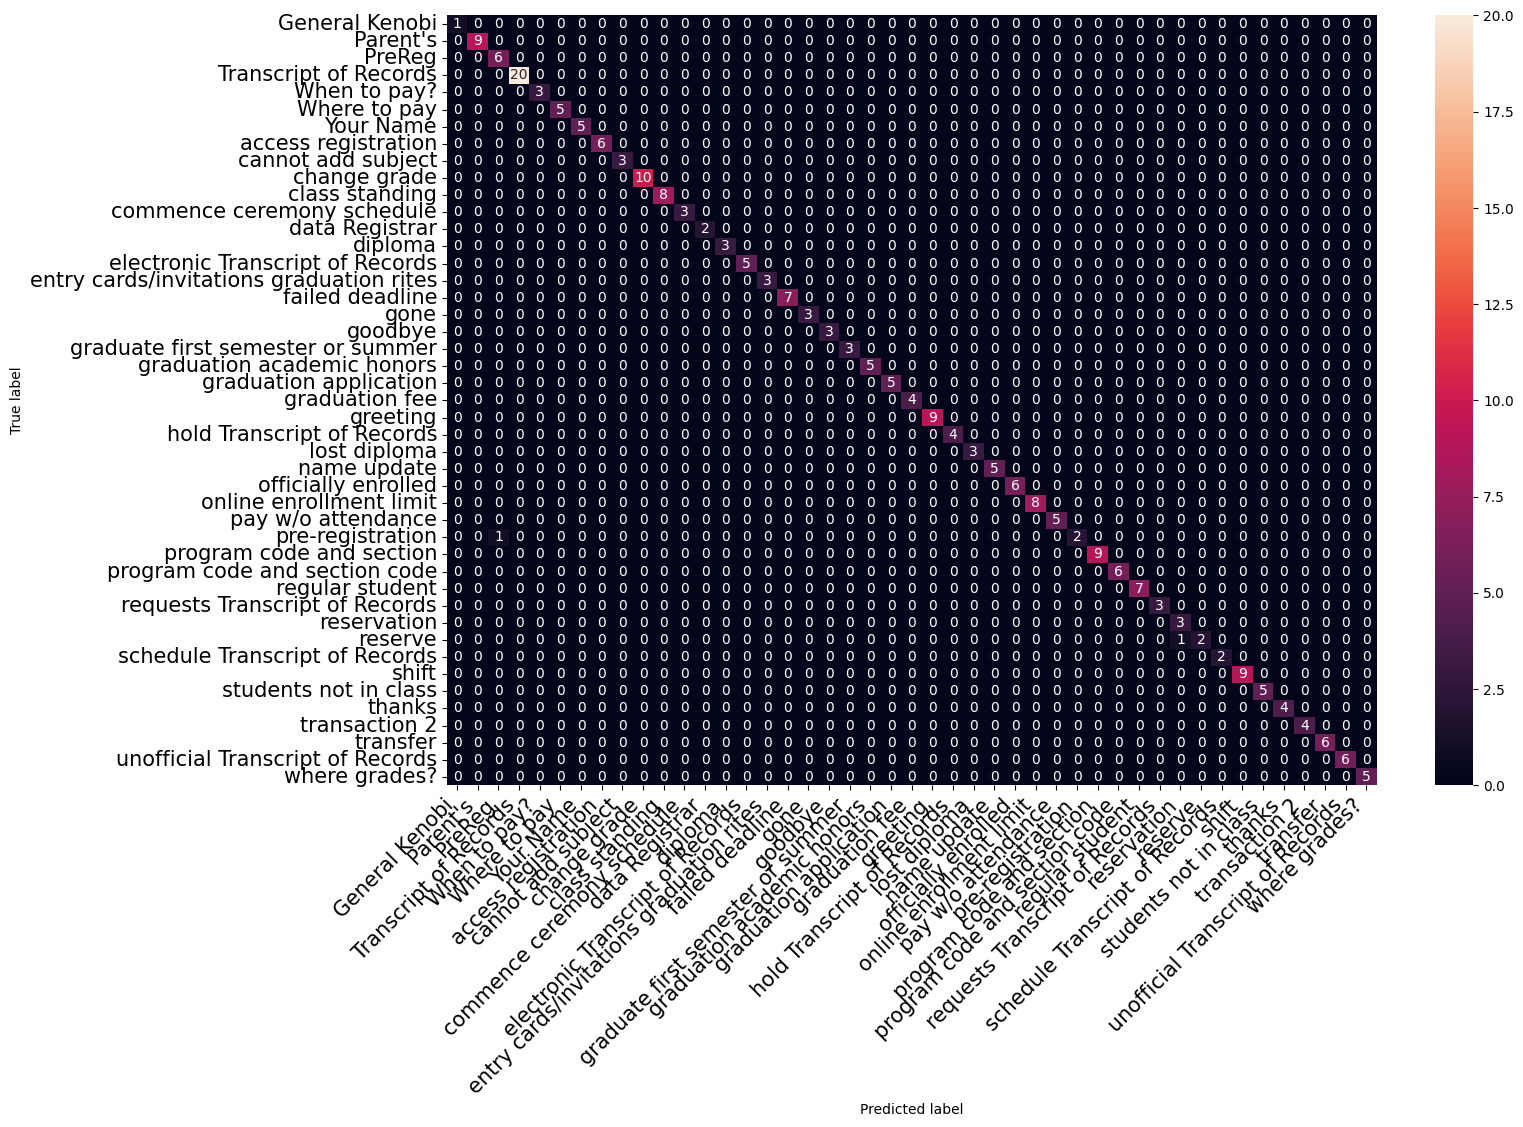

In [580]:
FILE = "RMSprop.pth"
data = torch.load(FILE)
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
check_accuracy(train_loader, model)
check_cnfmatrix(train_loader, model)